In [1]:
from __future__ import absolute_import, division, print_function

# Statisctical feature explorations

In this notebokk I will investigate the correlations in the engineered features.

## Imports

In [3]:
import os
import pickle
import time

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


%matplotlib inline

## Data

In [4]:
cwd = os.getcwd()
df_2013 = pd.read_pickle(os.path.join(cwd,'data','df_2013_features.df'))
df_2014 = pd.read_pickle(os.path.join(cwd,'data','df_2014_features.df'))



## Geographical distribution of yield

In [8]:
df_2013['yield'].describe()

count    955.000000
mean      31.430157
std       15.239594
min        9.000000
25%       17.300000
50%       31.100000
75%       43.000000
max       72.200000
Name: yield, dtype: float64

In [9]:
df_2014['yield'].describe()

count    982.000000
mean      33.829532
std       10.643828
min       12.900000
25%       25.700000
50%       32.900000
75%       41.500000
max       78.000000
Name: yield, dtype: float64

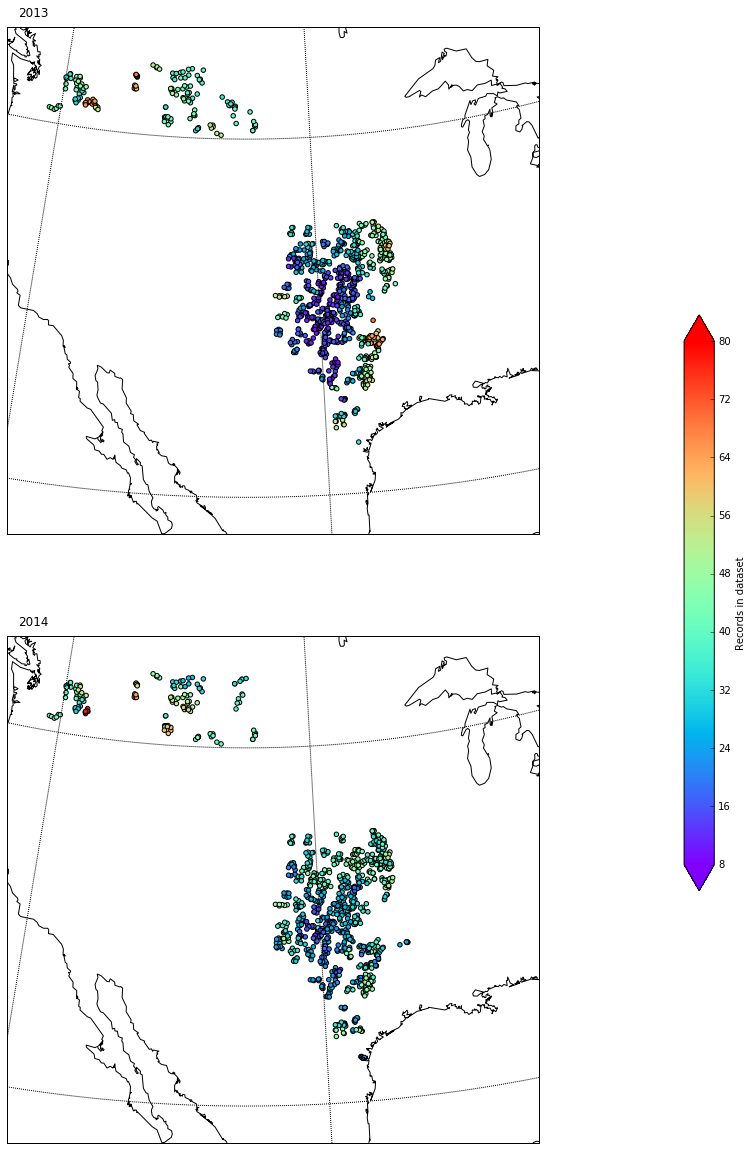

In [11]:
fig, ax = plt.subplots(2,1,figsize=(14, 20))

mymap = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-80,
                urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
                lon_0=-105, area_thresh=10000,
                resolution = 'l',ax=ax[0])

for idx,df in enumerate([df_2013,df_2014]):
    
    mymap = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-80,
                    urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
                    lon_0=-105, area_thresh=10000,
                    resolution = 'l',ax=ax[idx])

    lng = df['longitude'].tolist()
    lat = df['latitude'].tolist()
    yld = df['yield'].tolist()
    x,y = mymap(lng, lat)

    im1 = mymap.scatter(x, y, c=yld, vmin=8, vmax=80, cmap=mpl.cm.get_cmap('rainbow'), zorder=2)

    mymap.drawparallels(np.arange(25,65,20))
    mymap.drawmeridians(np.arange(-120,-40,20))
    mymap.drawcoastlines()

    label = ['2013','2014']
    ax[idx].annotate(label[idx], xy=(0.02, 1.02), fontsize=12,xycoords='axes fraction')

cax1 = fig.add_axes( [0.92, 0.3, 0.03, 0.4])
cbar = plt.colorbar(im1,cax=cax1, orientation='vertical', extend='both', use_gridspec=True)
cbar.set_label('Records in dataset')





## Simple correlations

In [12]:
df_2013.corr()

,longitude,latitude,elevation,LOD,total_precipitation,minMAT30,maxMAT30,ratioMNDVI30,mean_wind_speed,mean_temperature_diff,std_temperature_diff,yield
longitude,1.000000,-0.745337,-0.558814,0.775693,-0.282993,0.538358,0.721711,-0.412315,0.503860,0.536888,0.318145,-0.209294
latitude,-0.745337,1.000000,0.509359,-0.997335,0.491905,-0.939465,-0.932120,0.640524,-0.221710,-0.622915,-0.379329,0.366882
elevation,-0.558814,0.509359,1.000000,-0.509513,0.282942,-0.561883,-0.669962,0.406692,0.135180,0.107492,-0.017646,-0.101419
LOD,0.775693,-0.997335,-0.509513,1.000000,-0.492032,0.926108,0.938367,-0.660224,0.255472,0.646048,0.404976,-0.380055
total_precipitation,-0.282993,0.491905,0.282942,-0.492032,1.000000,-0.537179,-0.519645,0.395835,0.086696,-0.364086,-0.328318,0.134507
minMAT30,0.538358,-0.939465,-0.561883,0.926108,-0.537179,1.000000,0.917463,-0.716942,-0.018700,0.460781,0.300171,-0.283977
maxMAT30,0.721711,-0.932120,-0.669962,0.938367,-0.519645,0.917463,1.000000,-0.676847,0.154056,0.548613,0.438625,-0.398683
ratioMNDVI30,-0.412315,0.640524,0.406692,-0.660224,0.395835,-0.716942,-0.676847,1.000000,0.005370,-0.309154,-0.280688,0.196578
mean_wind_speed,0.503860,-0.221710,0.135180,0.255472,0.086696,-0.018700,0.154056,0.005370,1.000000,0.567278,0.352349,-0.423897
mean_temperature_diff,0.536888,-0.622915,0.107492,0.646048,-0.364086,0.460781,0.548613,-0.309154,0.567278,1.000000,0.775869,-0.661640


In [14]:
# Find all column pairs with correlation coefficients above a certain threshold
X = df_2013.corr()
limit = 0.65
index = X.index.tolist()
n = len(index)
newDF = pd.DataFrame(columns=['col1','col2','corr','corr col1 with target', 'corr col2 with target'])
pos = 0
for nidx,idx in enumerate(index):
    for k in range(n):
        if (k > nidx):
            value = X[idx].iloc[k]
        else:
            value = 0.0
        if value >= limit:
            corr_col1 = X['yield'].loc[idx]
            corr_col2 = X['yield'].loc[index[k]]
            newDF.loc[pos] = [idx, index[k] , value, corr_col1, corr_col2]
            pos += 1



In [15]:
newDF.sort_values(by='corr', ascending=False)

,col1,col2,corr,corr col1 with target,corr col2 with target
3,LOD,maxMAT30,0.938367,-0.380055,-0.398683
2,LOD,minMAT30,0.926108,-0.380055,-0.283977
4,minMAT30,maxMAT30,0.917463,-0.283977,-0.398683
5,mean_temperature_diff,std_temperature_diff,0.775869,-0.661640,-0.607049
0,longitude,LOD,0.775693,-0.209294,-0.380055
1,longitude,maxMAT30,0.721711,-0.209294,-0.398683


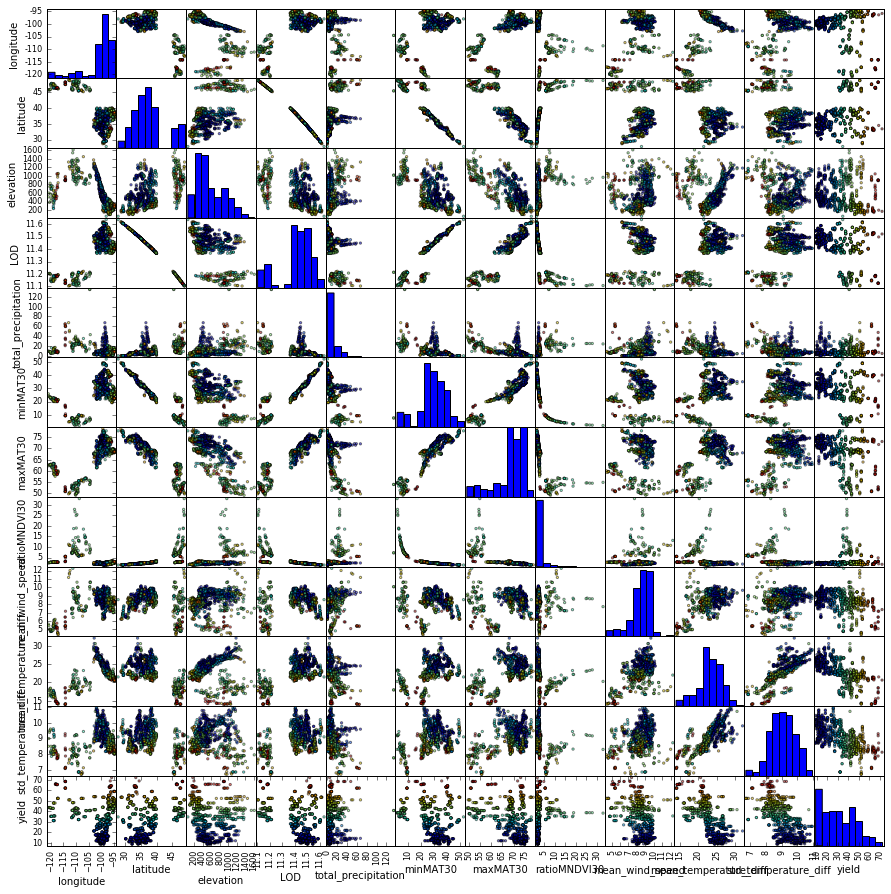

In [17]:
import matplotlib.cm as cm
# Below, 'c' gives the values that should be mapped onto a colormap 'cmap'.
# http://stackoverflow.com/questions/28752727/map-values-to-colors-in-matplotlib
pd.scatter_matrix(df_2013, diagonal='hist', figsize=(15, 15),
                  c=df_2013['yield'].tolist(), cmap=cm.get_cmap('jet'));

There are a number of correlated features, but strictly linear correlations are sparse.

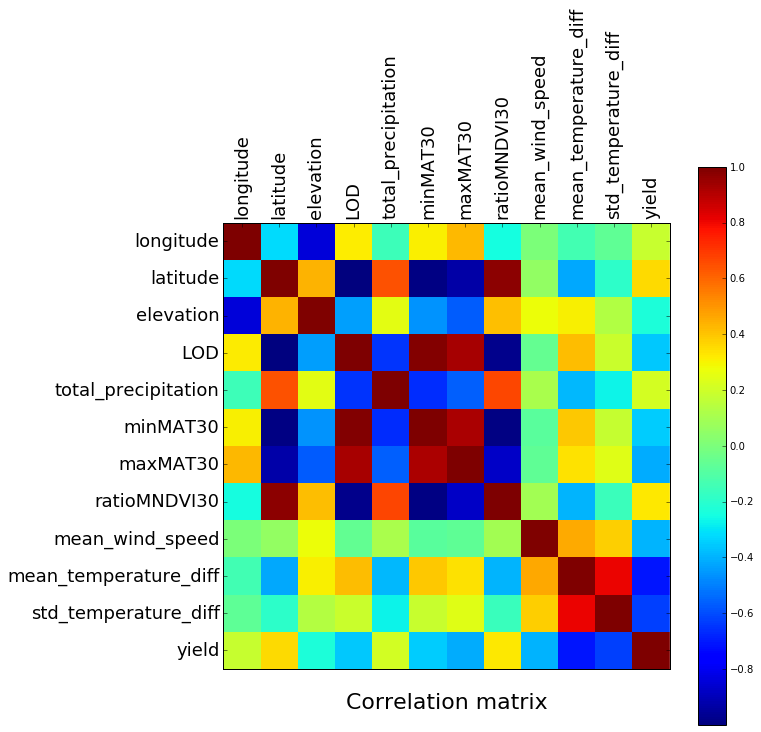

In [18]:
# Plot correlation matrix - Spearman
# Adjust labels to include all column names
fig, ax = plt.subplots(figsize=(10, 10))
# condition on which columns to carry over
corr =  df_2013.corr(method='spearman')
plt.imshow(corr,interpolation='none')
# Add colorbar
plt.colorbar()
plt.locator_params(axis='x', nticks=9)
labels = corr.columns
# Set custom tick labels - these two lines are where the deprecation warning originates
ax.set_xticklabels([''] + labels,rotation=90)
ax.set_yticklabels([''] + labels)
# Move x-axis labels to top
ax.xaxis.set_ticks_position('top')
# Set axis label size
ax.tick_params(labelsize=18)
# Adjust tick position x-axis
start, end = ax.get_xlim()
stepsize = 1.0
ax.set_xticks(np.arange(start+0.5,end+0.5, stepsize))
ax.set_xlim(start,end)
# Adjust tick position yaxis
start, end = ax.get_ylim()
stepsize = 1.0
ax.set_yticks(np.arange(end+0.5,start+0.5, stepsize))
ax.set_ylim(start,end)
# Add title
ax.set_title('Correlation matrix', fontsize=22,y=-0.1)
# Save figure
# plt.savefig(os.path.join(supp_dir,'correlation_matrix.png'), bbox_inches='tight')

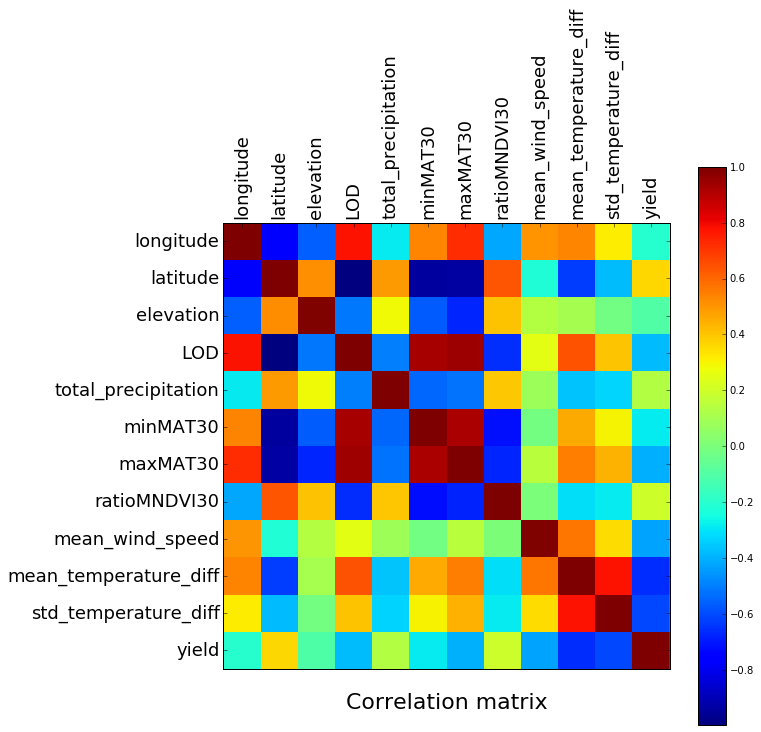

In [19]:
# Plot correlation matrix - Pearson
# Adjust labels to include all column names
fig, ax = plt.subplots(figsize=(10, 10))
# condition on which columns to carry over
corr =  df_2013.corr()
plt.imshow(corr,interpolation='none')
# Add colorbar
plt.colorbar()
plt.locator_params(axis='x', nticks=9)
labels = corr.columns
# Set custom tick labels - these two lines are where the deprecation warning originates
ax.set_xticklabels([''] + labels,rotation=90)
ax.set_yticklabels([''] + labels)
# Move x-axis labels to top
ax.xaxis.set_ticks_position('top')
# Set axis label size
ax.tick_params(labelsize=18)
# Adjust tick position x-axis
start, end = ax.get_xlim()
stepsize = 1.0
ax.set_xticks(np.arange(start+0.5,end+0.5, stepsize))
ax.set_xlim(start,end)
# Adjust tick position yaxis
start, end = ax.get_ylim()
stepsize = 1.0
ax.set_yticks(np.arange(end+0.5,start+0.5, stepsize))
ax.set_ylim(start,end)
# Add title
ax.set_title('Correlation matrix', fontsize=22,y=-0.1)
# Save figure
# plt.savefig(os.path.join(supp_dir,'correlation_matrix.png'), bbox_inches='tight')